# 1. inner / left
Даны две таблицы A и B, где присутсвует по одному столбцу с значениями 1, 2 и 1, 3 соответсвенно.

При запросе SELECT * FROM A JOIN B ON A.id = B.id; будет возвращена объединенная табличка:

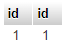

При запросе SELECT * FROM A LEFT JOIN B ON A.id = B.id; будет возвращена объединенная табличка:

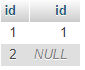

# 2. Лучший ученик
Данную задачу можно решить с помощью подзапроса:

SELECT subject_id, student_id FROM grades WHERE  grade=(SELECT MAX(grade) FROM grades);

Но у данной задачи может быть много не оговоренных условий, например несколько учеников по одному предмету могут иметь одинаковые оценки, которые будут максимальными из всего класса. Это означает, что нужно выводить обоих учеников в нашем запросе.

#3. Онлайн-кассы
1. Выведите количество активных подписок для каждого приложения с ID и наименованием приложения и ID и описанием категории.

Будем подразумевать, что в таблице "subscriptions" столбца "status" используется булево значение: 0 - ложь (false), 1 - истина (true).



In [ ]:
SELECT 
	  COUNT(s.subscriptions_id) AS 'Колличество подписок', 
    a.name AS 'Название приложения', 
    a.product_id AS 'ID приложения', 
    ac.id AS 'ID категории', 
    ac.description AS 'Описание категории'
FROM app a
    LEFT JOIN app_category ac ON a.category_id = ac.id 
    LEFT JOIN subscriptions s ON a.product_id = s.product_id
WHERE 
    s.status is true 
GROUP BY a.product_id, a.name, ac.id, ac.description

2. Выведите количество пользователей, количество и сумму платежей по тем подпискам, которые были отменены в разрезе тарифов.

In [ ]:
SELECT 
	  COUNT(s.user_id) AS 'Колличество пользователей',
    COUNT(p.subscriptions_id) AS 'Колличество платежей',
    SUM(p.amount) AS 'Сумма'
FROM subscriptions s
    LEFT JOIN payments p ON s.subscriptions_id = p.subscriptions_id
WHERE s.cancelled_at IS NOT NULL

3. Выведите top-10 приложений по убыванию оборота по приложению. Оборот воспринимается как кол-во пользователей которые юзают приложение. 

In [ ]:
SELECT a.name 
FROM app a
    LEFT JOIN subscriptions s ON a.product_id = s.product_id
GROUP BY a.name
ORDER BY COUNT(s.user_id) DESC 
LIMIT 10

4. Выведите top-3 приложений в каждой категории по убыванию оборота по приложению. 

Оборот воспринимается как платежи (amount) за определенные подписки приложений. Имеется ввиду, что не именно оплата подписки, а платежи в приложение. Например можно авансом закинуть на год вперед определенную сумму и это будет считаться за оборот средств. 


In [ ]:
WITH category_sum_apps AS (
SELECT a.name, a.category_id, sum(p.amount) sum
FROM payments p
LEFT JOIN app a ON a.product_id = p.product_id
GROUP BY a.name
ORDER BY a.category_id
)
SELECT csa.name
FROM category_sum_apps csa
WHERE (select count(*) FROM category_sum_apps csa1 where csa.category_id = csa1.category_id AND csa.sum > csa1.sum) < 3;